# Feature Engineering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# Para mostrar todas las columnas.
pd.pandas.set_option('display.max_columns',None)

## Cargar el dataset

In [3]:
data = pd.read_csv("../../datasets/houseprices.csv")
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Separation in train/test
X_train, X_test, y_train, y_test = train_test_split(data, data.SalePrice,
                                                   test_size = 0.1,
                                                   random_state = 0)

X_train.shape, X_test.shape

((1314, 81), (146, 81))

## Missing Values

In [5]:
# For categorical variables, add an extra category "missing"
# Obtain categorical variables with missing values
# OJO! Podría haber missingness en el test y no en el train, no es seguro esto...
# Se cambió el X_train por data...
vars_with_na = [var for var in data.columns if data[var].isnull().sum() >= 1 and X_train[var].dtypes == "O"]

for var in vars_with_na:
    print(var, np.round(data[var].isnull().mean(), 3)*100, " % of missing")


Alley 93.8  % of missing
MasVnrType 0.5  % of missing
BsmtQual 2.5  % of missing
BsmtCond 2.5  % of missing
BsmtExposure 2.6  % of missing
BsmtFinType1 2.5  % of missing
BsmtFinType2 2.6  % of missing
Electrical 0.1  % of missing
FireplaceQu 47.3  % of missing
GarageType 5.5  % of missing
GarageFinish 5.5  % of missing
GarageQual 5.5  % of missing
GarageCond 5.5  % of missing
PoolQC 99.5  % of missing
Fence 80.80000000000001  % of missing
MiscFeature 96.3  % of missing


In [6]:
# Function to replace NA in categorical variable
def fill_categorical_na(df, var_list):
    X = df.copy()
    X[var_list] = df[var_list].fillna("Missing")
    return X

In [7]:
X_train = fill_categorical_na(X_train, vars_with_na)
X_test = fill_categorical_na(X_test, vars_with_na)

# Ver que no haya missing.
X_train[vars_with_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

## Missing values in numerical variables

In [8]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum()>= 1 and data[var].dtypes != "O"]

for var in vars_with_na:
    print(var, np.round(data[var].isnull().mean(), 3)*100, " % of missing")
    

LotFrontage 17.7  % of missing
MasVnrArea 0.5  % of missing
GarageYrBlt 5.5  % of missing


In [9]:
# Replacing the missing values.
for var in vars_with_na:
    # Calcular la moda.
    mode_val = X_train[var].mode()[0]
    
    # Agregamos un indicador binario de missing value para la variable.
    X_train[var+'_na'] = np.where(X_train[var].isnull(), 1,0)
    X_train[var].fillna(mode_val, inplace=True)
    
    X_test[var+'_na'] = np.where(X_test[var].isnull(), 1,0)
    X_test[var].fillna(mode_val, inplace=True)

    

In [10]:
# No hay más datos faltantes.
X_train[vars_with_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

## Temporal Variables

In [11]:
def elapsed_years(df, var):
    df[var] = df["YrSold"] - df[var]
    return df

In [12]:
for var in ["YearBuilt", "YearRemodAdd", "GarageYrBlt"]:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [13]:
X_train[["YearBuilt", "YearRemodAdd", "GarageYrBlt"]].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
930,2,2,2.0
656,49,2,49.0
45,5,5,5.0
1348,9,9,9.0
55,44,44,44.0


In [14]:
# chequear que no haya nulls en el test.
[var for var in ["YearBuilt", "YearRemodAdd", "GarageYrBlt"] if X_test[var].isnull().sum() >= 1]

[]

## Numerical Variables Transformation

In [15]:
# Raro que incluya SalePrice, es variable de respuesta.
transformable_var = ["LotFrontage", "LotArea", "1stFlrSF", "GrLivArea", "SalePrice"]

for var in transformable_var:
    X_train[var] = np.log(X_train[var])
    X_test[var] = np.log(X_test[var])

In [16]:
# Chequear que no haya faltantes.
[var for var in transformable_var if X_test[var].isnull().sum()>=1]

[]

In [17]:
[var for var in transformable_var if X_train[var].isnull().sum()>=1]

[]

## Categorical Variables

In [18]:
cat_vars = [var for var in X_train.columns if X_train[var].dtype == "O"]
cat_vars

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [19]:
# Obtener los índices de las filas que tienen una cantidad apreciable de cada etiqueta
def find_frequent_labels(df, var, rare_perc):
    tmp = df.groupby(var)["SalePrice"].count() / len(df)
    return tmp[tmp>rare_perc].index

In [20]:
#Reemplazar las etiquetas raras (menos del 1%) por "Rare"
for var in cat_vars:
    frequent_labels = find_frequent_labels(X_train, var, 0.01)
    X_train[var] = np.where(X_train[var].isin(frequent_labels), X_train[var], "Rare")
    X_test[var] = np.where(X_test[var].isin(frequent_labels), X_test[var], "Rare")

## Numerical encoding of categorical variables

In [21]:
# "target" sería SalePrice
# se reemplaza de forma tal que valores bajos se corresponden con media de SalePrice
# bajos
def replace_categories(train, test, var, target):
    # Ordenamos las etiquetas de la variable categórica
    ordered_labels = train.groupby(var)[target].mean().sort_values().index
    ordinal_label = { k: i for i,k in enumerate(ordered_labels,0)}
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)

In [22]:
for var in cat_vars:
    replace_categories(X_train, X_test, var, "SalePrice")


In [23]:
# Mirar que no haya na en train.
[var for var in X_train.columns if X_train[var].isnull().sum() >= 1]

[]

In [24]:
# Mirar que no haya na en test.
[var for var in X_test.columns if X_test[var].isnull().sum() >= 1]

[]

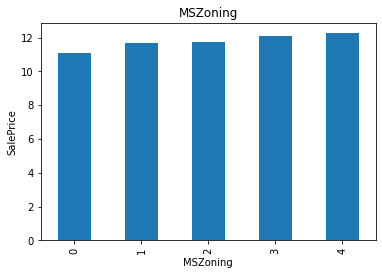

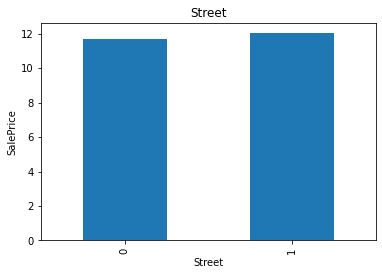

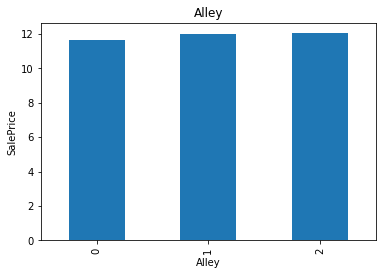

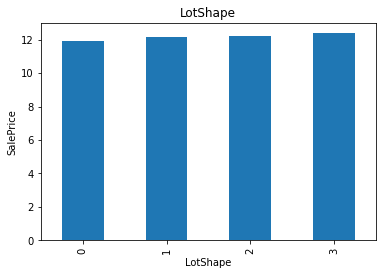

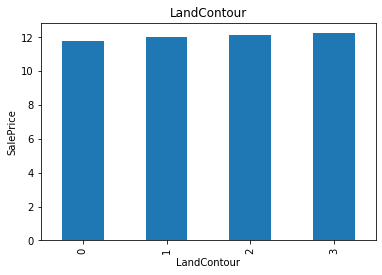

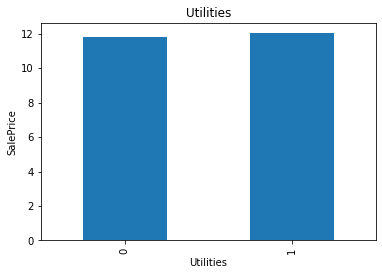

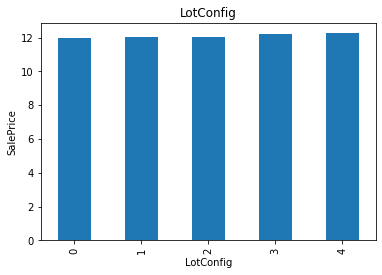

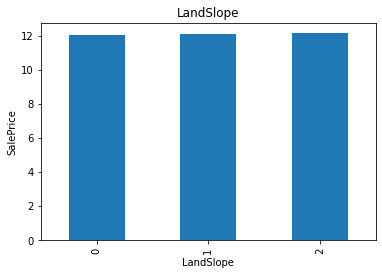

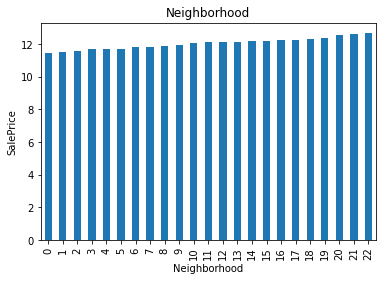

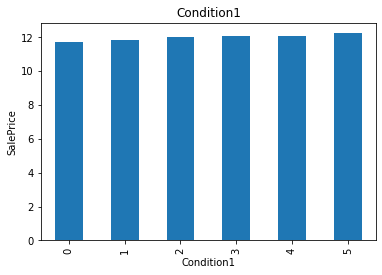

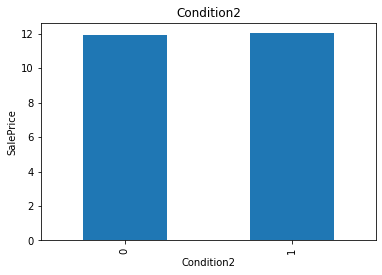

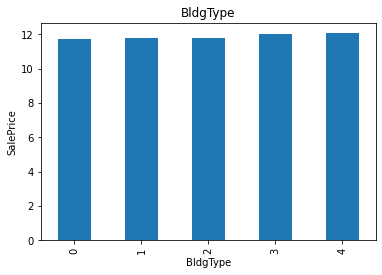

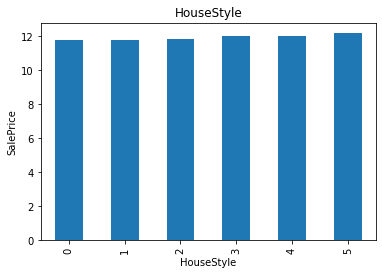

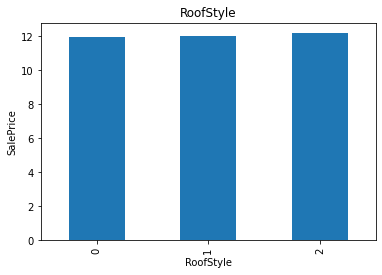

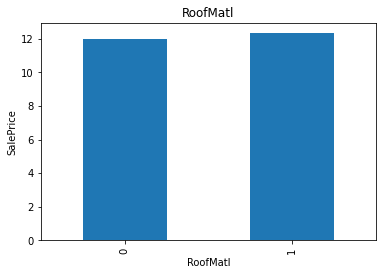

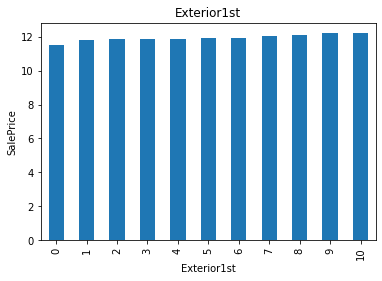

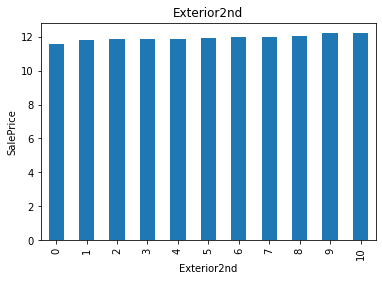

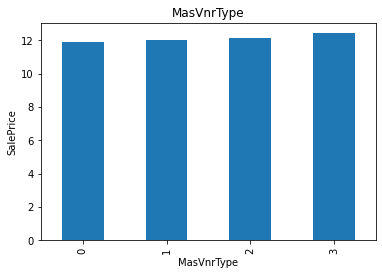

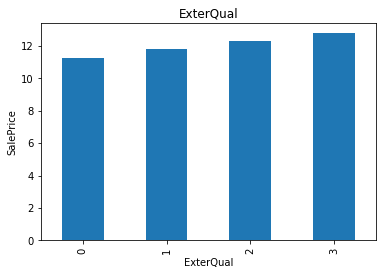

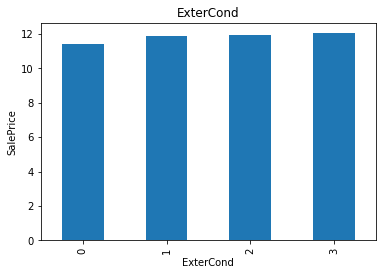

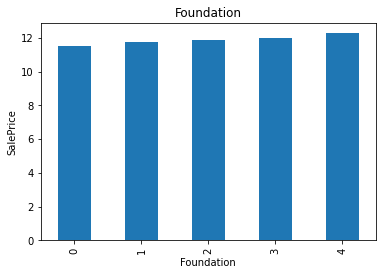

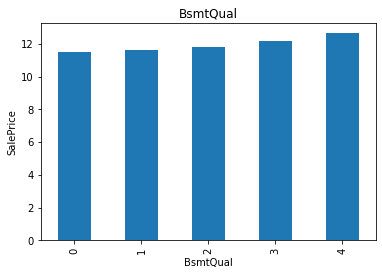

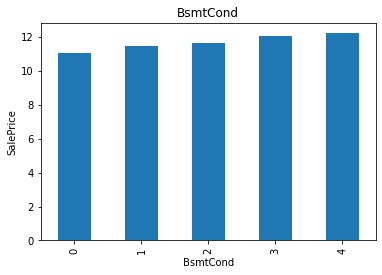

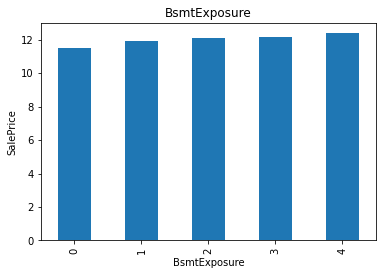

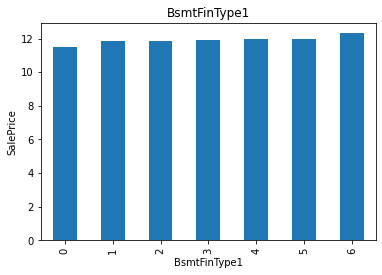

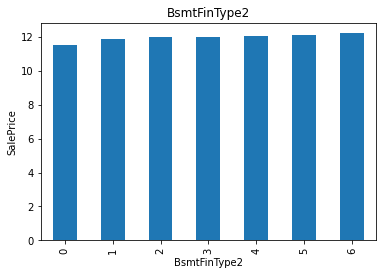

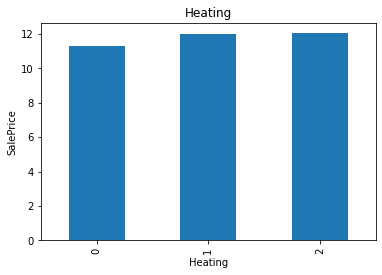

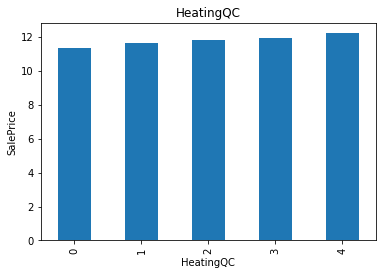

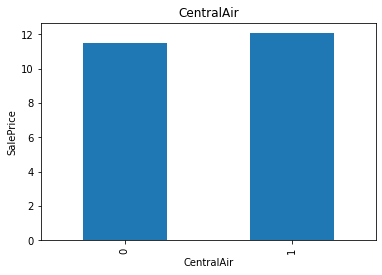

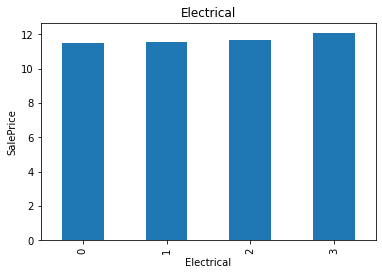

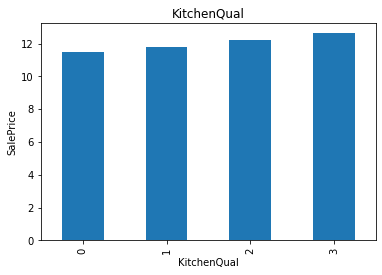

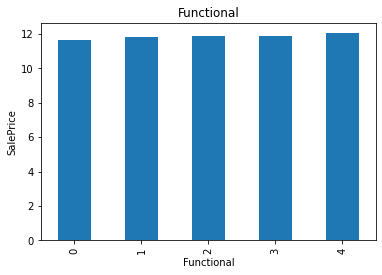

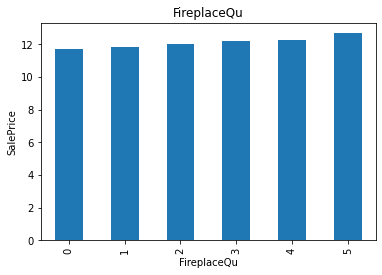

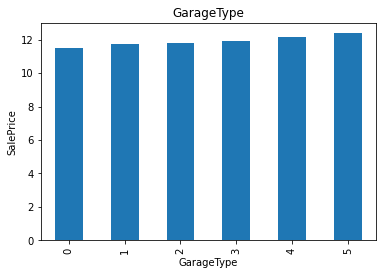

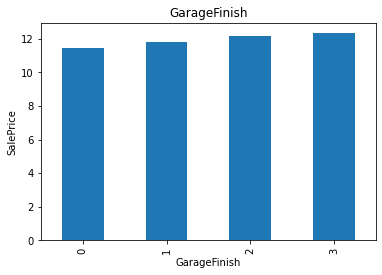

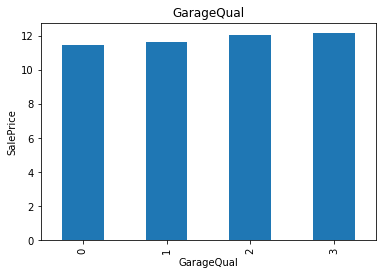

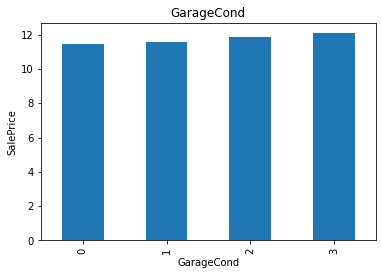

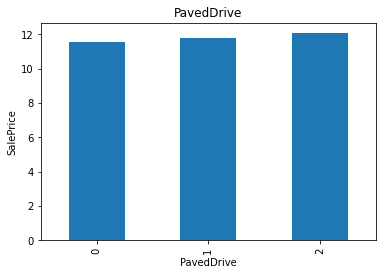

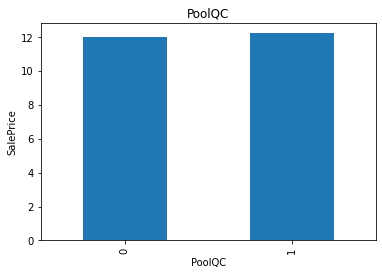

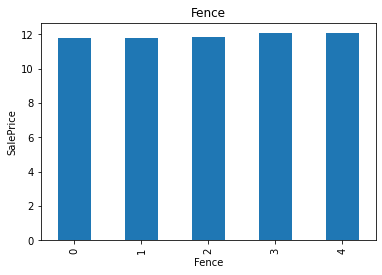

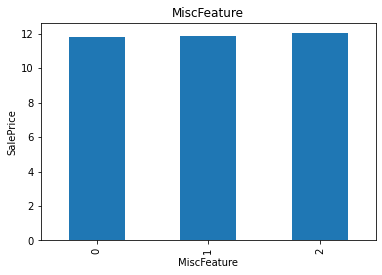

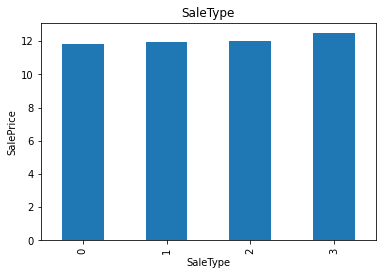

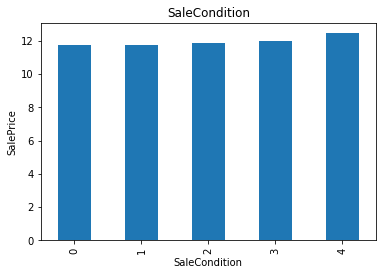

In [25]:
# Relación monotónica entre etiquetas y target.
def show_relationship(df, var):
    df.groupby(var)["SalePrice"].mean().plot.bar()
    plt.title(var)
    plt.ylabel("SalePrice")
    plt.show()

for var in cat_vars:
    show_relationship(X_train, var)

## Feature Scaling

In [26]:
train_vars = [var for var in X_train.columns if var not in ["Id", "SalePrice"]]
len(train_vars)

82

In [27]:
# Fit Scaler.
scaler = MinMaxScaler()
scaler.fit(X_train[train_vars])


MinMaxScaler()

In [28]:
# Transform the train and test set, and then add the Id and SalePrice.
meta_train = X_train[["Id", "SalePrice"]].reset_index(drop=True)
meta_test = X_test[["Id", "SalePrice"]].reset_index(drop=True)

# Transform trainable variables
scaled_train = pd.DataFrame(scaler.transform(X_train[train_vars]), columns=train_vars)
scaled_test = pd.DataFrame(scaler.transform(X_test[train_vars]), columns=train_vars)

# Add the meta columns.
X_train = pd.concat([meta_train, scaled_train], axis=1)
X_test = pd.concat([meta_test, scaled_test], axis=1)


In [29]:
X_train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,931,12.211060,0.000000,0.75,0.461171,0.377048,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,0.75,1.000000,0.002835,0.666667,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.2,0.8,0.018692,1.000000,0.75,0.430183,0.666667,1.0,1.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.75,0.666667,0.75,0.0,0.0,0.0
1,657,11.887931,0.000000,0.75,0.456066,0.399443,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,1.0,0.5,0.50,0.75,0.25,0.666667,0.142807,0.666667,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.8,0.457944,0.666667,0.25,0.220028,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.50,1.0,0.0,0.636364,0.50,0.666667,0.75,0.0,0.0,0.0
2,46,12.675764,0.588235,0.75,0.394699,0.347082,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,1.0,1.0,1.00,0.75,0.25,1.000000,0.080794,0.666667,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.8,0.046729,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.090909,1.00,0.666667,0.75,0.0,0.0,0.0
3,1349,12.278393,0.000000,0.75,0.388581,0.493677,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,1.00,1.000000,0.255670,0.666667,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.8,0.084112,0.666667,0.50,0.362482,0.666667,1.0,1.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.25,0.666667,0.75,1.0,0.0,0.0
4,56,12.103486,0.000000,0.75,0.577658,0.402702,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.086818,0.666667,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.8,0.411215,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.50,0.666667,0.75,0.0,0.0,0.0


## Saving the Data

In [30]:
X_train.to_csv("../../datasets/xtrain.csv", index=False)
X_test.to_csv("../../datasets/xtest.csv", index=False)